# Кластеризация. Метод K-Means. Домашнее задание

## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [74]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Mall_Customers_.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
duplicates_count = df.duplicated().sum()
print(f'Количество дублирующихся строк: {duplicates_count}')

Количество дублирующихся строк: 0


In [76]:
unique_count = df['CustomerID'].nunique()
print(f'Количество уникальных значений в столбце "CustomerID  ": {unique_count}')

Количество уникальных значений в столбце "CustomerID  ": 200


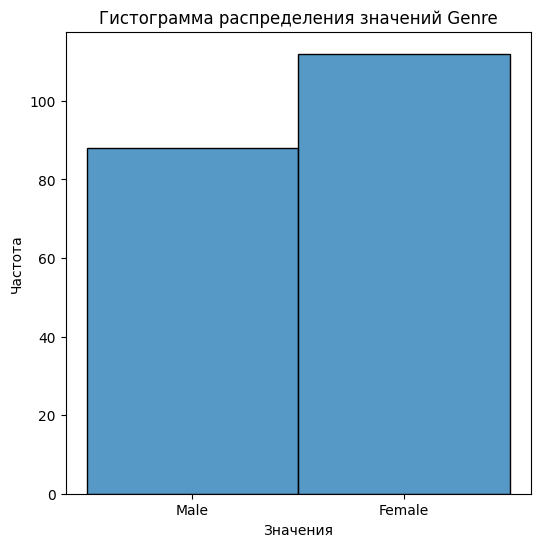

In [77]:
# Визуализация гистограммы

plt.figure(figsize=(6, 6))
sns.histplot(df['Genre'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Genre')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

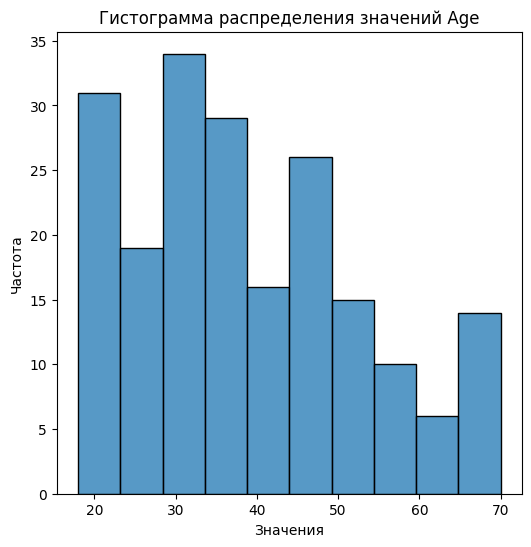

In [78]:
# Визуализация возраста

plt.figure(figsize=(6, 6))
sns.histplot(df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

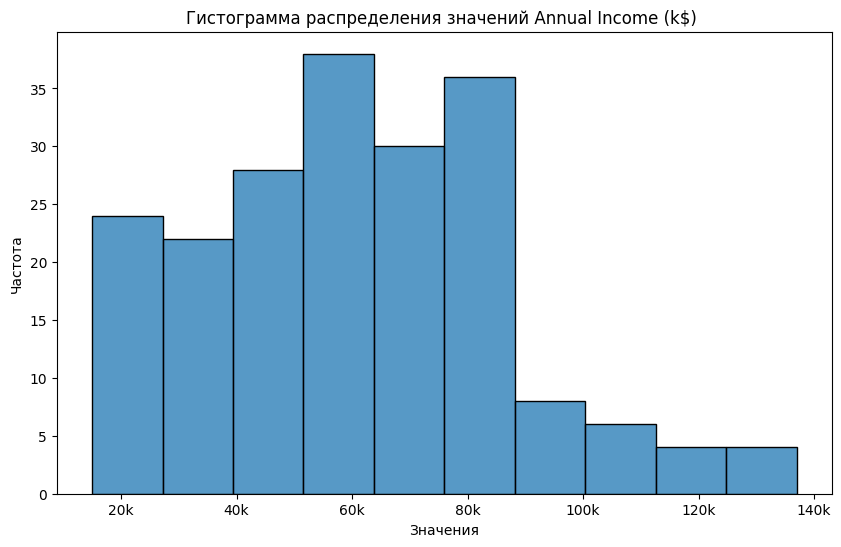

In [79]:
from matplotlib.ticker import FuncFormatter
# Визуализация гистограммы

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Annual Income (k$) ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


В датасете отсутствуют пропуски, данные сбалансированы по 'Genre', отсутствуют выбросы, дубликаты, все Customer_ID уникальны

Преобразуем Пол людей с помощью One-Hot Encoding

In [81]:
# Применение One-Hot Encoding

df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

print("DataFrame с One-Hot Encoding:")

print(df)

DataFrame с One-Hot Encoding:
     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_Female  Genre_Male  
0           False        True  
1           False        True  
2            True       False  
3            True       F

Исследуем зависимости датасета

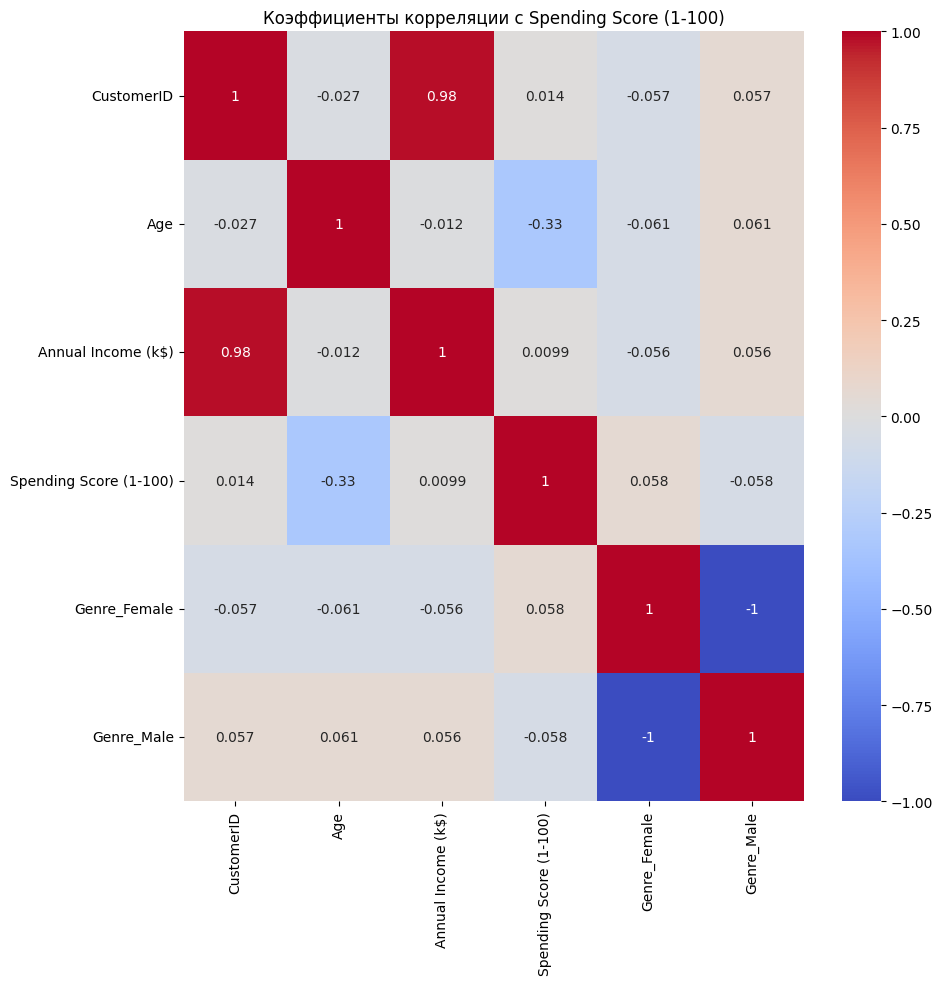

In [82]:
corr_matrix = df.corr()
# Извлечение корреляций с 'Diagnosis'
diagnosis_corr = corr_matrix['Spending Score (1-100)']
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Коэффициенты корреляции с Spending Score (1-100)')
plt.show()

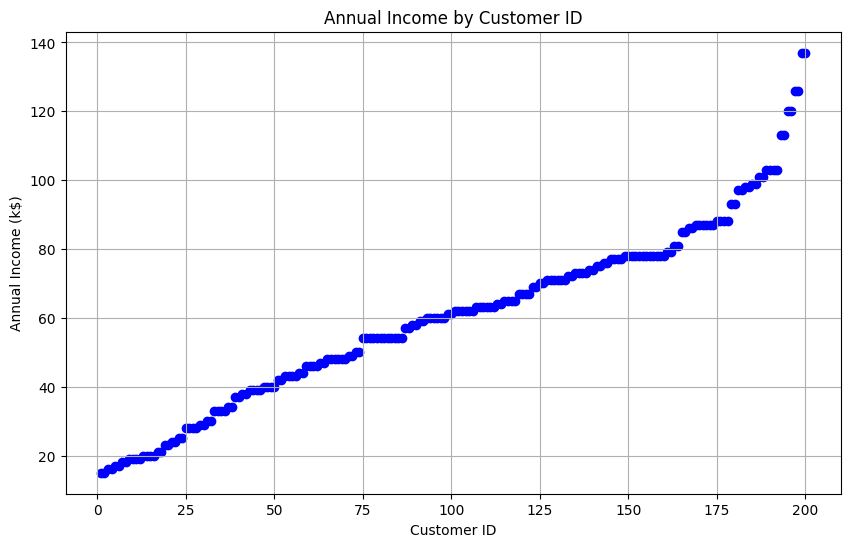

In [83]:
# Построение графика

plt.figure(figsize=(10, 6))

plt.scatter(df['CustomerID'], df['Annual Income (k$)'], color='blue')

plt.title('Annual Income by Customer ID')

plt.xlabel('Customer ID')

plt.ylabel('Annual Income (k$)')

plt.grid()

plt.show()

Данные в датасете отсортированы по возрастанию Annual Income (k$) 

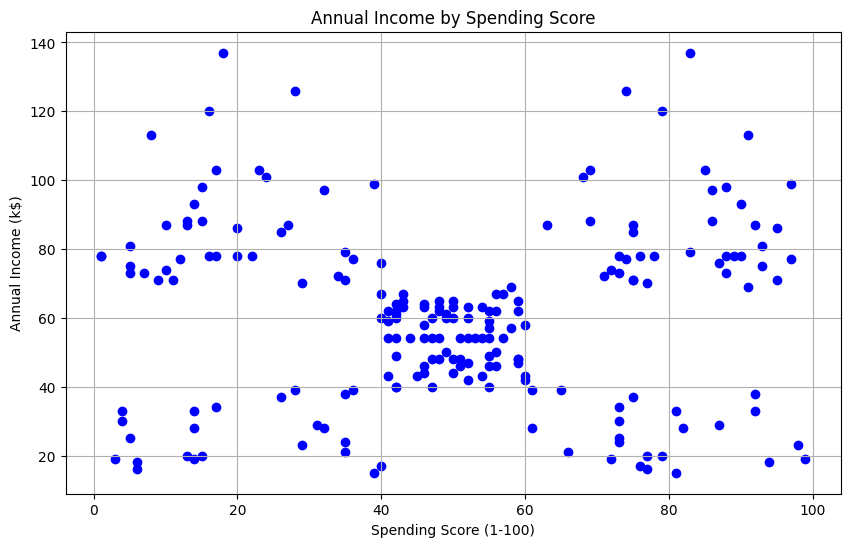

In [84]:
# Построение графика

plt.figure(figsize=(10, 6))

plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], color='blue')

plt.title('Annual Income by Spending Score')

plt.xlabel('Spending Score (1-100)')

plt.ylabel('Annual Income (k$)')

plt.grid()

plt.show()

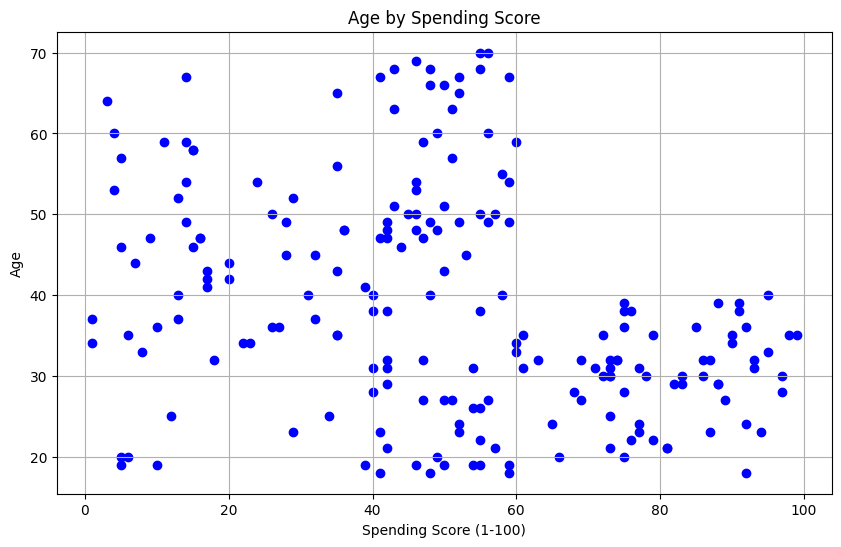

In [85]:
# Построение графика

plt.figure(figsize=(10, 6))

plt.scatter(df['Spending Score (1-100)'], df['Age'], color='blue')

plt.title('Age by Spending Score')

plt.xlabel('Spending Score (1-100)')

plt.ylabel('Age')

plt.grid()

plt.show()

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

Судя по графику зависимости Spending Score (1-100) и Annual Income (k$) мы имеем дело с 5 классами, определяемыми соотношением и абсолютными значениями этих двух признаков (Высокие расходы и высокий годовой доход, усреднённые показатели расходов и доходов и прочие вариации сочетаний, всего 5 вариантов)

### Задание 3

Преобразуйте категориальный признак Genre в численный.

In [86]:
# Преобразование булевых признаков в числовые

df['Genre_Female'] = df['Genre_Female'].astype(int)

df['Genre_Male'] = df['Genre_Male'].astype(int)

### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Genre_Female            200 non-null    int64
 5   Genre_Male              200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Genre_Female', 'Genre_Male']]

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)


# Преобразуйте обратно в DataFrame, если нужно

scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Genre_Female', 'Genre_Male'])

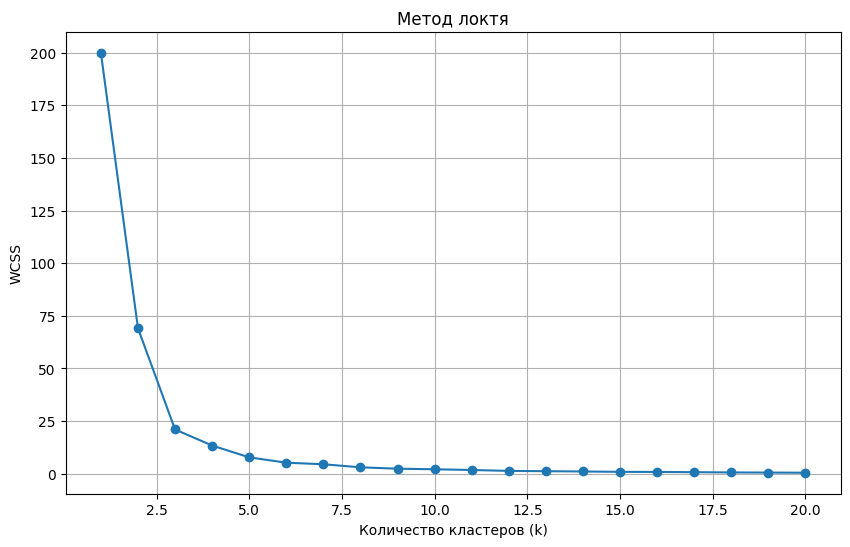

In [89]:
from sklearn.cluster import KMeans
# Функция для вычисления WCSS

def calculate_wcss(data):

    wcss = []

    for i in range(1, 21):  # Проверяем от 1 до 20 кластеров

        kmeans = KMeans(n_clusters=i, random_state=42)

        kmeans.fit(data)

        wcss.append(kmeans.inertia_)

    return wcss


# Вычисление WCSS

wcss = calculate_wcss(scaled_df[['Spending Score (1-100)']])


# Построение графика локтя

plt.figure(figsize=(10, 6))

plt.plot(range(1, 21), wcss, marker='o')

plt.title('Метод локтя')

plt.xlabel('Количество кластеров (k)')

plt.ylabel('WCSS')

plt.grid()

plt.show()

Метод локтя так же сходится к значению 5 кластеров

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

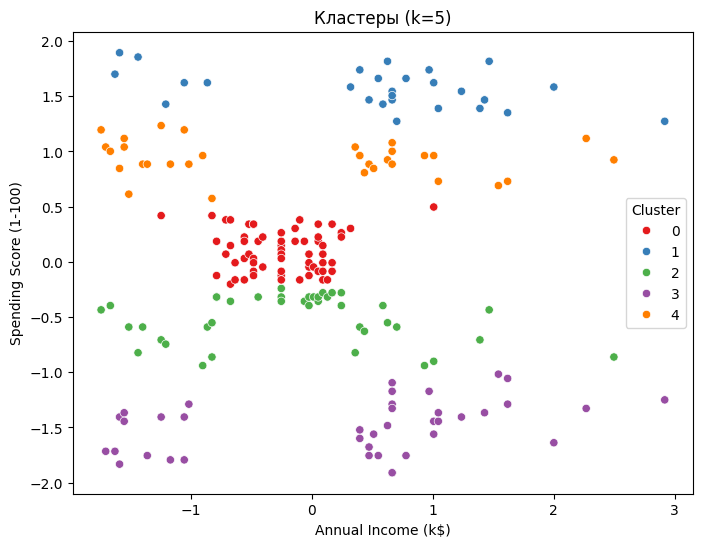

In [90]:
# Построение модели k-средних с оптимальным k

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

scaled_df['Cluster'] = kmeans.fit_predict(scaled_df[['Spending Score (1-100)']])


# Визуализация кластеров (для 2D-пространства по двум признакам)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df['Annual Income (k$)'], y=scaled_df['Spending Score (1-100)'], hue=scaled_df['Cluster'], palette='Set1')
plt.title(f'Кластеры (k={optimal_k})')
plt.show()

# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [91]:
df_2 = pd.read_csv('gt_2015.csv')
df_2.info()
df_2.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [92]:
duplicates_count = df_2.duplicated().sum()
print(f'Количество дублирующихся строк: {duplicates_count}')

Количество дублирующихся строк: 0


In [93]:
correlation_matrix = df_2.corr()

print(correlation_matrix)

            AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.493098 -0.466288  0.468976  0.193578  0.330112  0.208277   
AP   -0.493098  1.000000  0.084381 -0.094144 -0.043730 -0.081605 -0.290147   
AH   -0.466288  0.084381  1.000000 -0.245456 -0.297708 -0.260683  0.026251   
AFDP  0.468976 -0.094144 -0.245456  1.000000  0.843958  0.915128 -0.519807   
GTEP  0.193578 -0.043730 -0.297708  0.843958  1.000000  0.892851 -0.620652   
TIT   0.330112 -0.081605 -0.260683  0.915128  0.892851  1.000000 -0.396161   
TAT   0.208277 -0.290147  0.026251 -0.519807 -0.620652 -0.396161  1.000000   
TEY   0.109437  0.050326 -0.182732  0.884954  0.932337  0.951813 -0.633933   
CDP   0.200909  0.029420 -0.221706  0.922991  0.938142  0.951590 -0.656613   
CO   -0.390647  0.200945  0.158999 -0.640789 -0.557177 -0.738092  0.025768   
NOX  -0.593580  0.214236  0.065351 -0.584452 -0.366655 -0.520081  0.054455   

           TEY       CDP        CO       NOX  
AT    0.109437  

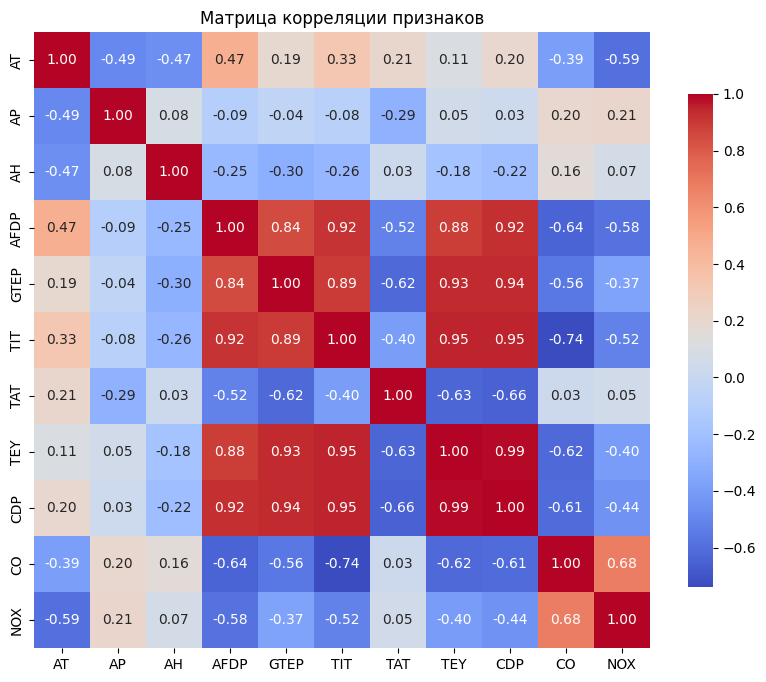

In [94]:
plt.figure(figsize=(10, 8))


# Построение тепловой карты

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


# Настройка заголовка

plt.title('Матрица корреляции признаков')

plt.show()

In [95]:
from sklearn.decomposition import PCA
# Стандартизация данных

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_2)
# Применение PCA

pca = PCA(n_components=3) 

pca_result = pca.fit_transform(scaled_data)


# Преобразование результата в DataFrame

pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3'])

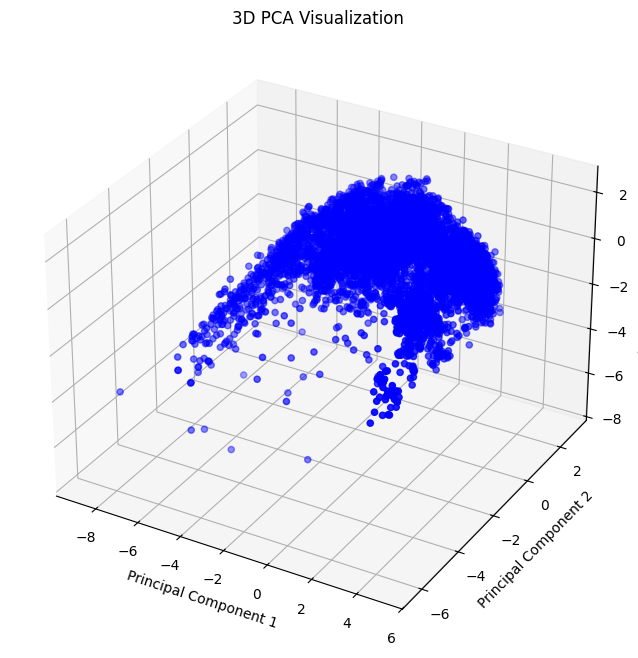

In [96]:
# Визуализация в 3D

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')


# Отрисовка точек

ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], c='b', marker='o')


# Настройка меток осей

ax.set_xlabel('Principal Component 1')

ax.set_ylabel('Principal Component 2')

ax.set_zlabel('Principal Component 3')


# Заголовок графика

ax.set_title('3D PCA Visualization')


# Показать график

plt.show()

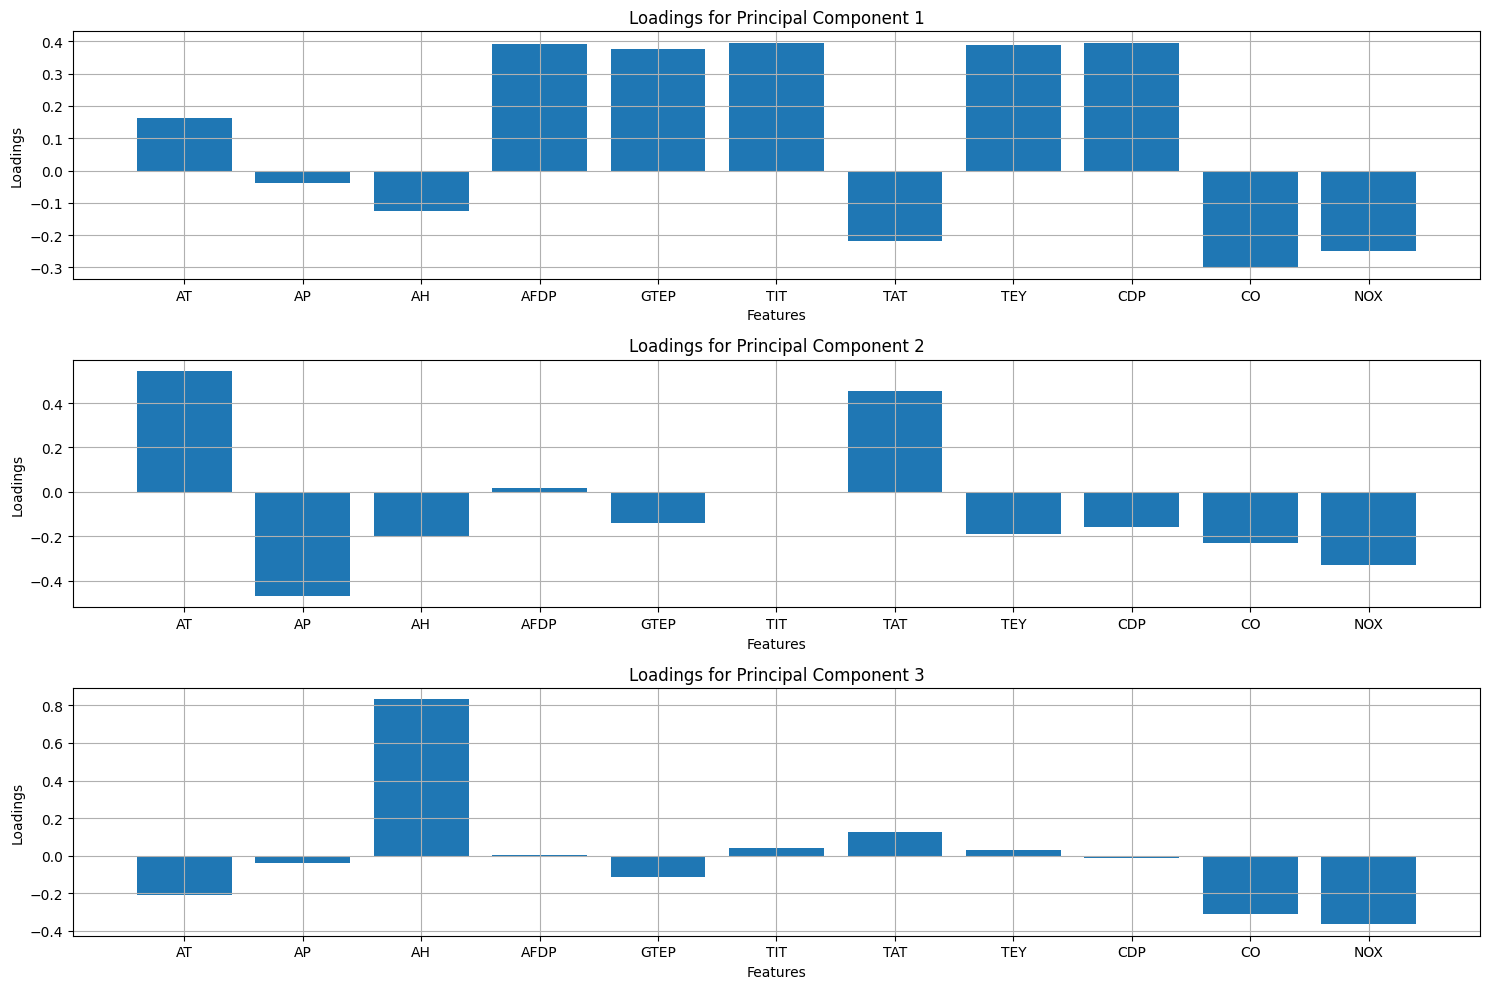

In [97]:
# Получение коэффициентов

loadings = pca.components_

import matplotlib.pyplot as plt


# Визуализация нагрузок для каждой главной компоненты

plt.figure(figsize=(15, 10))


# График для первой главной компоненты
plt.subplot(3, 1, 1)
plt.bar(range(len(loadings[0])), loadings[0], tick_label=df_2.columns)
plt.title('Loadings for Principal Component 1')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.grid()

# График для второй главной компоненты
plt.subplot(3, 1, 2)
plt.bar(range(len(loadings[1])), loadings[1], tick_label=df_2.columns)
plt.title('Loadings for Principal Component 2')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.grid()

# График для третьей главной компоненты
plt.subplot(3, 1, 3)
plt.bar(range(len(loadings[2])), loadings[2], tick_label=df_2.columns)
plt.title('Loadings for Principal Component 3')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.grid()
plt.tight_layout()

plt.show()

                       Principal Component 1  Principal Component 2  \
Principal Component 1           1.000000e+00          -1.576753e-15   
Principal Component 2          -1.576753e-15           1.000000e+00   
Principal Component 3          -2.884077e-16           9.219749e-17   

                       Principal Component 3  
Principal Component 1          -2.884077e-16  
Principal Component 2           9.219749e-17  
Principal Component 3           1.000000e+00  


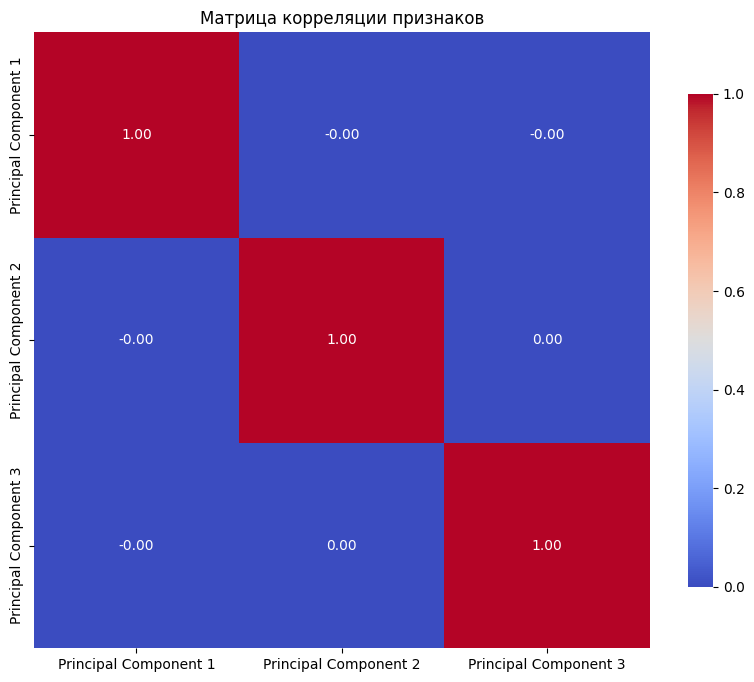

In [98]:
correlation_matrix = pca_df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))

# Построение тепловой карты

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


# Настройка заголовка

plt.title('Матрица корреляции признаков')

plt.show()

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

судя по визуализации нагрузки на каждую из 3 главных компонент, можно выделить несколько групп:
1. Группа станций, определяемая параметром AT (определяется 2 компонентой)
2. Группа станций, определяемая параметром AP (определяется 2 компонентой)
3. Группа станций, определяемая параметром AH (определяется 3 компонентой)
4. Группа станций, определяемая параметром TAT (определяется 2 компонентой)
5. Группа станций, определяемая любым сочетанием параметров AFDP, GTEP, TIT, TEY, CDP (определяется 1 компонентой)

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

eps: 0.1, min_samples: 1, silhouette_score: 0.11595617302048536
eps: 0.1, min_samples: 2, silhouette_score: -0.3145737344560219
eps: 0.1, min_samples: 3, silhouette_score: -0.5137677610464289
eps: 0.1, min_samples: 4, silhouette_score: -0.6255201357253788
eps: 0.1, min_samples: 5, silhouette_score: -0.6856627282377608
eps: 0.1, min_samples: 6, silhouette_score: -0.6182426675997028
eps: 0.1, min_samples: 7, silhouette_score: -0.5846110758945231
eps: 0.1, min_samples: 8, silhouette_score: -0.4862457706461386
eps: 0.1, min_samples: 9, silhouette_score: -0.42696938378059357
eps: 0.2, min_samples: 1, silhouette_score: -0.4112024240252905
eps: 0.2, min_samples: 2, silhouette_score: -0.43226716112467134
eps: 0.2, min_samples: 3, silhouette_score: -0.46100574398801836
eps: 0.2, min_samples: 4, silhouette_score: -0.4702345849639011
eps: 0.2, min_samples: 5, silhouette_score: -0.4727423359731065
eps: 0.2, min_samples: 6, silhouette_score: -0.4501801442825759
eps: 0.2, min_samples: 7, silhouette_

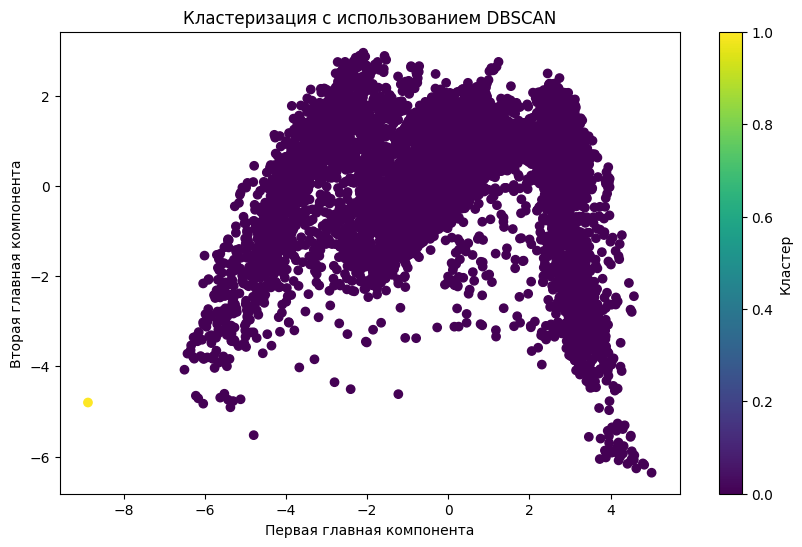

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, 10.0, 100)  # Пример диапазона для eps
min_samples_values = range(1, 10)  # Пример диапазона для min_samples

best_score = -1
best_eps = None
best_min_samples = None
# 2. Перебор значений гиперпараметров

for eps in eps_values:
    for min_samples in min_samples_values:
        # Обучение модели DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_df)
        # Проверка, что есть более одного кластера
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(pca_df, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, silhouette_score: {silhouette_avg}')
            # Сохранение лучших гиперпараметров
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

# 3. Вывод лучших гиперпараметров
print(f'Лучший eps: {best_eps}')
print(f'Лучший min_samples: {best_min_samples}')
print(f'Лучший силуэтный коэффициент: {best_score}')
# 4. Обучение модели с оптимальными гиперпараметрами
optimal_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = optimal_dbscan.fit_predict(pca_df)
# 5. Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Кластеризация с использованием DBSCAN')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(label='Кластер')
plt.show()

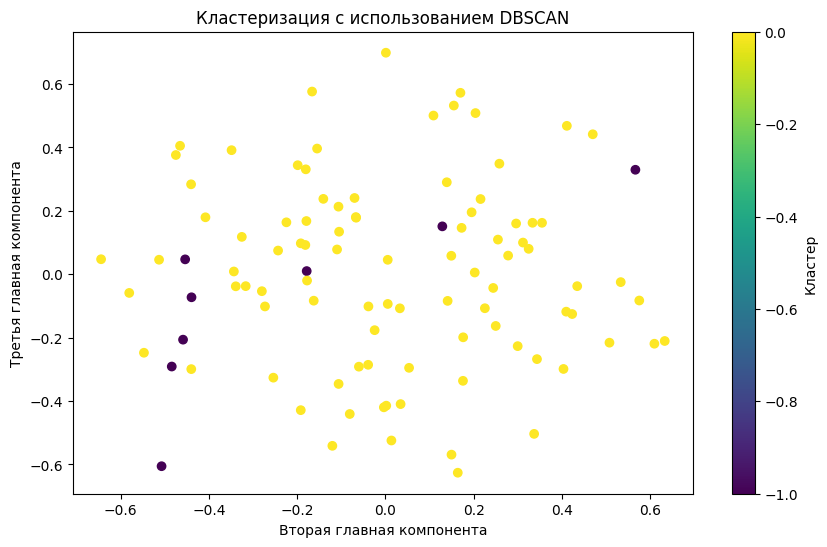

In [40]:
# 5. Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.iloc[:, 1], pca_df.iloc[:, 2], c=labels, cmap='viridis', marker='o')
plt.title('Кластеризация с использованием DBSCAN')
plt.xlabel('Вторая главная компонента')
plt.ylabel('Третья главная компонента')
plt.colorbar(label='Кластер')
plt.show()

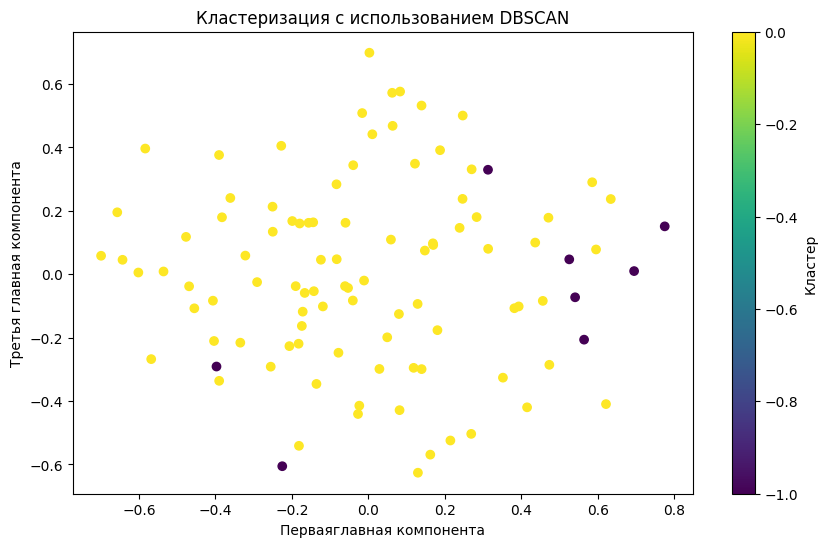

In [41]:
# 5. Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 2], c=labels, cmap='viridis', marker='o')
plt.title('Кластеризация с использованием DBSCAN')
plt.xlabel('Перваяглавная компонента')
plt.ylabel('Третья главная компонента')
plt.colorbar(label='Кластер')
plt.show()

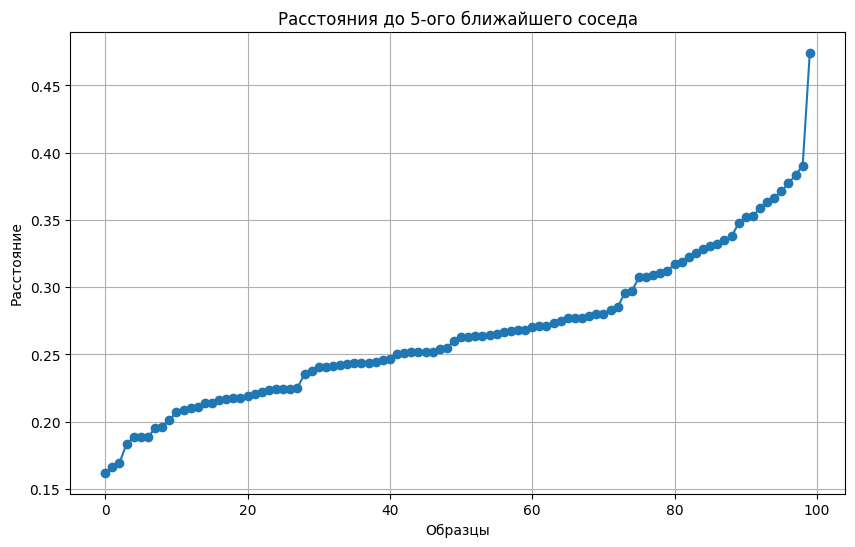

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Определение числа ближайших соседей
k = 5
# Вычисление расстояний до k-ого ближайшего соседа
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

# Сортировка расстояний до k-ого ближайшего соседа
kth_distances = np.sort(distances[:, k-1], axis=0)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(kth_distances, marker='o')
plt.title(f'Расстояния до {k}-ого ближайшего соседа')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.grid()
plt.show()

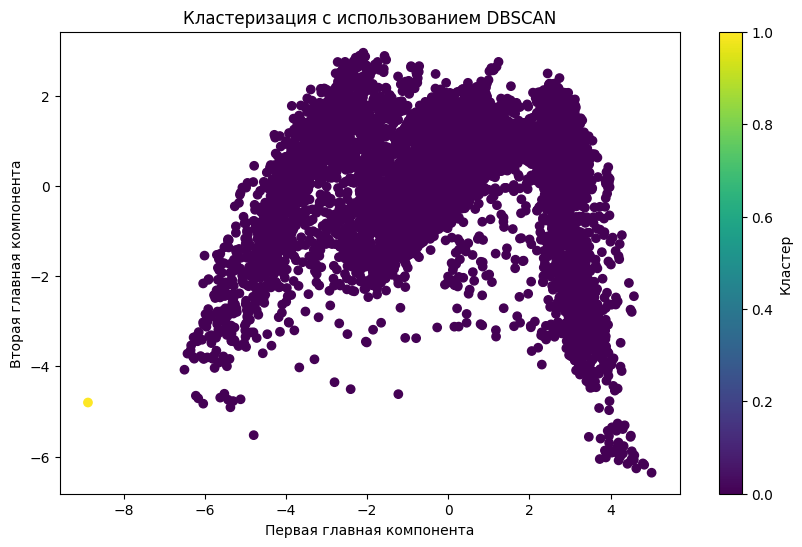

In [103]:
optimal_dbscan = DBSCAN(eps=2.7, min_samples=1)
labels = optimal_dbscan.fit_predict(pca_df)
# 5. Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Кластеризация с использованием DBSCAN')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(label='Кластер')
plt.show()

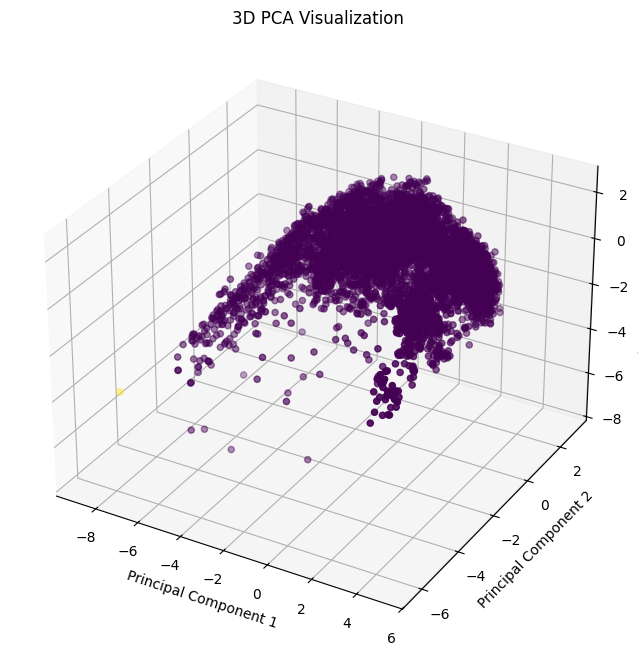

In [104]:
optimal_dbscan = DBSCAN(eps=2.7, min_samples=1)
labels = optimal_dbscan.fit_predict(pca_df)
# Визуализация в 3D

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')


# Отрисовка точек

ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], c=labels, marker='o')


# Настройка меток осей

ax.set_xlabel('Principal Component 1')

ax.set_ylabel('Principal Component 2')

ax.set_zlabel('Principal Component 3')


# Заголовок графика

ax.set_title('3D PCA Visualization')


# Показать график

plt.show()

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.

DBSCAN Не смог выделить кластеры на гиперпараметрах, соответствующих оптимальному профилю. Судя по всему всё дело в расстояниях между соседями - слишком плотно размещены параметры и в рассмотренных диапазонах, почти всегда найдётся k-нужных соседей, таким образом всё распределение сливается в единый кластер.
Так же возможно было ошибкой применить PCA для снижения размерности, возможно было бы лучше просто выбросить параметры с высокой кореляцией.